In [1]:
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"]  = 300
plt.style.use('dark_background')

In [2]:
gauge_path = "/home/iielse/Documents/DIWA/data/omat digitoinnit/CAMELS-FI flow gauges.gpkg"

gauges = geopd.read_file(gauge_path, layer='snapped')

catchment_path = "CAMELS-FI catchments/CAMELS-FI_catchments.gpkg"
catchments = geopd.read_file(catchment_path, layer='attributes_v1')

In [3]:
gauges

,gauge_id,dem_id,geometry
0,2739,0,POINT (489184.91 7496587.245)
1,2740,0,POINT (482704.914 7482197.084)
2,3727,0,POINT (485784.912 7343165.529)
3,3728,0,POINT (484364.913 7344875.548)
4,1351,0,POINT (489524.91 7538637.715)
...,...,...,...
315,3264,69,POINT (457385 6703365)
316,1390,70,POINT (262125 7652515)
317,938,71,POINT (508815 6999975)
318,952,72,POINT (531575 6988205)


In [4]:
for i, row in gauges.iterrows():
    gauges.loc[i, 'nestedness'] = catchments.geometry.intersects(row.geometry).sum()
    

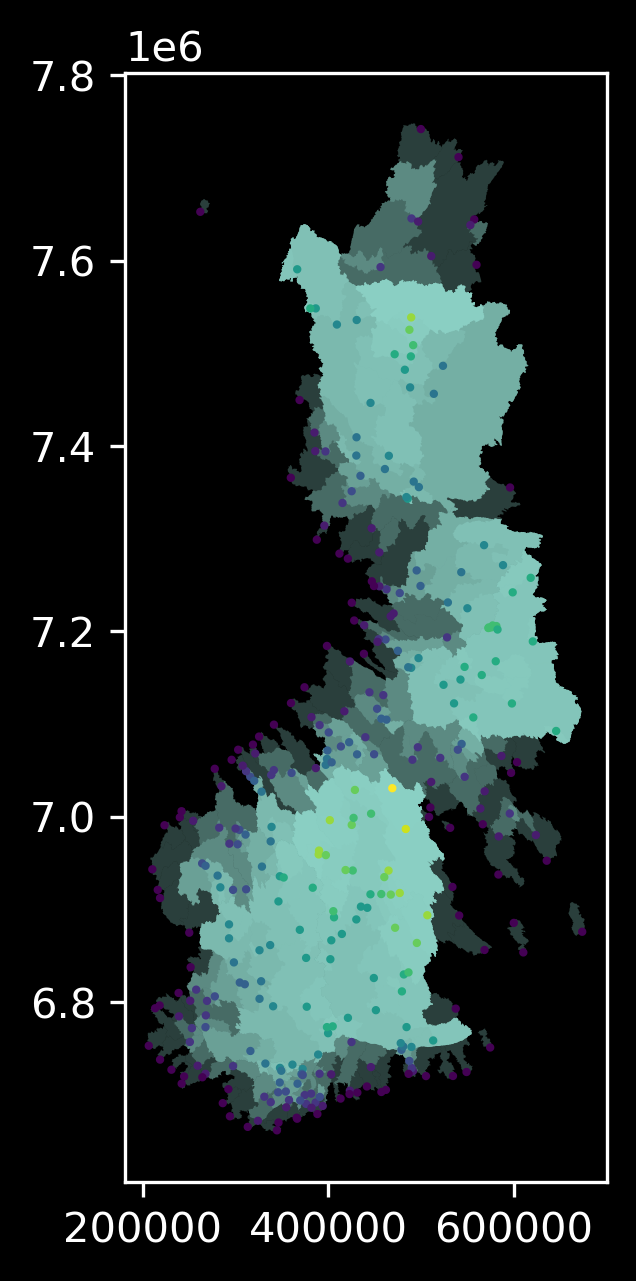

In [5]:
ax = catchments.plot(alpha=0.3)
ax = gauges.plot('nestedness', ax=ax, markersize=1)

In [6]:
gauges.to_file(gauge_path, layer='snapped')